NS 2.1 (Königsberg problem)
- *a; c; and d; can be drawn without lifting the pencil because if we represent them as graphs they have 0 or 2 nodes with odd degree. b; can't be drawn without lifting the pencil because it has 4 nodes with odd degree.*

NS 2.3 (Graph representation)

In [413]:
import networkx as nx

G1 = nx.Graph()
G1.add_nodes_from([1, 2, 3, 4, 5, 6])
G1.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)])

G2 = nx.DiGraph()
G2.add_nodes_from([1, 2, 3, 4, 5, 6])
G2.add_edges_from([(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)])


In [414]:
#G1 adjacency matrix
nx.adjacency_matrix(G1).todense()

array([[0, 1, 1, 1, 0, 1],
       [1, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [415]:
#G2 adjacency matrix
nx.adjacency_matrix(G2).todense()

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]])

In [416]:
#G1 edge list
G1.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)])

In [417]:
#G2 edge list
G2.edges()

OutEdgeView([(1, 2), (2, 3), (2, 4), (3, 1), (3, 2), (4, 1), (6, 1), (6, 3)])

In [418]:
#G1 avarage clustering coefficient
nx.average_clustering(G1)

0.6388888888888888

In [419]:
#G1 with node 5 and 6 swapped
G12 = nx.Graph()
G12.add_nodes_from([1, 2, 3, 4, 5, 6])
G12.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)])
print(nx.adjacency_matrix(G12).todense())
print(G12.edges())

[[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]
[(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (3, 5)]


- After switching the labels of node 5 and 6 the 5th and 6th row of the adjacency matrix will be swapped.
- In the edge list the 6 changes to 5.

From the edge list we can't determine if here was any nodes with degree 0.

Find paths of length 3 between nodes 1 and 3 in G1, with repetition of nodes and edges allowed

the second step in the path has to be connected to 3 so it can only be either 1, 2 or 6
starting from 1 with repettion of nodes and edges allowed we can have the following 3 step paths:
- 1 -> 2 -> 1 -> 3
- 1 -> 3 -> 1 -> 3
- 1 -> 4 -> 1 -> 3
- 1 -> 6 -> 1 -> 3
- 1 -> 3 -> 2 -> 3
- 1 -> 4 -> 2 -> 3
- 1 -> 3 -> 6 -> 3

In G2 the only nodes with links to node 3 are node 2 and node 6. However there is no way to get to these nodes from node 1 in 2 steps. Therefore there are no paths of length 3 between nodes 1 and 3 in G2.

In [420]:
cycles = sorted(nx.simple_cycles(G1))
# find only the cycles with 4 nodes
cycles = [c for c in cycles if len(c) == 4]
print(cycles)

[[1, 2, 3, 6], [1, 3, 2, 4]]


In [421]:
cycles2 = sorted(nx.simple_cycles(G2))
print(cycles2)
# find only the cycles with 4 nodes
cycles2 = [c for c in cycles2 if len(c) == 4]
print(cycles2)
#there are no cycles with 4 nodes in G2

[[1, 2, 3], [1, 2, 4], [2, 3]]
[]


In [422]:
#Bipaartite graph
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
B.add_edges_from([(1, 7), (2, 9), (3, 7), (3, 8), (3, 9), (4, 9), (4, 10), (5, 9), (5, 11), (6, 11)])

#B bipartite adjacency matrix
nx.adjacency_matrix(B).todense()

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0]])

It is Anti-Diagonal because there are no links between the nodes in block 1-6 and 7-11

In [423]:
#get the bipartite sets
X, Y = nx.bipartite.sets(B)
print("Purple set:", X)
print("Green set:", Y)

#get the bipartite projections
Bpx = nx.bipartite.projected_graph(B, X)
print("Purple projection:")
print(nx.adjacency_matrix(Bpx).todense())

Bpy = nx.bipartite.projected_graph(B, Y)
print("Green projection:")
print(nx.adjacency_matrix(Bpy).todense())


Purple set: {1, 2, 3, 4, 5, 6}
Green set: {7, 8, 9, 10, 11}
Purple projection:
[[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]]
Green projection:
[[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [424]:
#Avarage degree of the Purple nodes
sum(dict(B.degree(X)).values())/len(X)


1.6666666666666667

In [425]:
#Avarage degree of the Green nodes
sum(dict(B.degree(Y)).values())/len(Y)

2.0

In [426]:
#Avarage degree of the Purple projection
sum(dict(Bpx.degree()).values())/len(Bpx)

2.6666666666666665

In [427]:
#Avarage degree of the Green projection
sum(dict(Bpy.degree()).values())/len(Bpy)


2.0

In [428]:
import matplotlib.pyplot as plt
import numpy as np
import random


mu, sigma = 2, 0.125 # mean and standard deviation
s = np.random.normal(mu, sigma, 5000)

np.histogram(s, bins=10)

(array([   3,   44,  263,  790, 1362, 1454,  765,  262,   51,    6]),
 array([1.52126161, 1.61700127, 1.71274093, 1.80848059, 1.90422026,
        1.99995992, 2.09569958, 2.19143924, 2.2871789 , 2.38291856,
        2.47865822]))

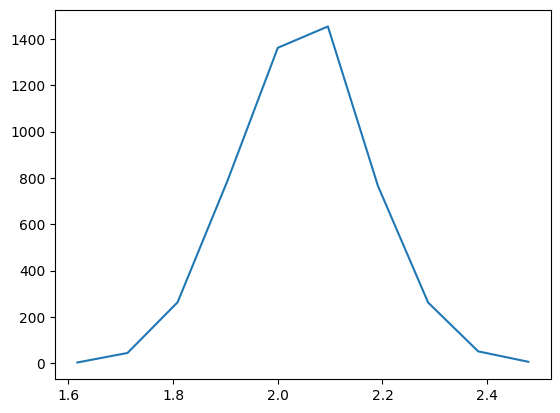

In [429]:
hist = np.histogram(s, bins=10)
plt.plot(hist[1][1:], hist[0])

In [430]:
poi = np.random.poisson(10, 5000)
print('min:', min(poi), 'max:', max(poi))

min: 1 max: 23


<BarContainer object of 22 artists>

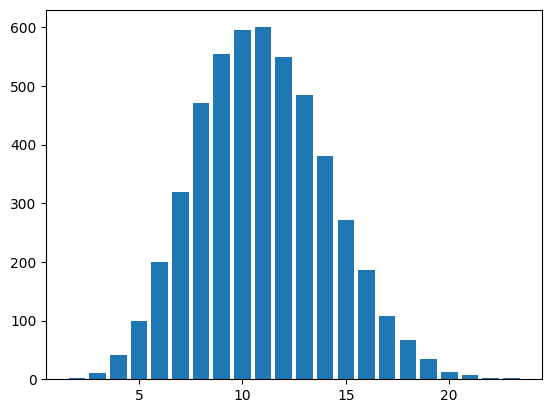

In [431]:
bin_v = np.arange(min(poi), max(poi)+1, 1)
hist = np.histogram(poi, bins=bin_v)

plt.bar(hist[1][1:], hist[0])

Text(0.5, 1.0, 'Degree distribution of the generated graph')

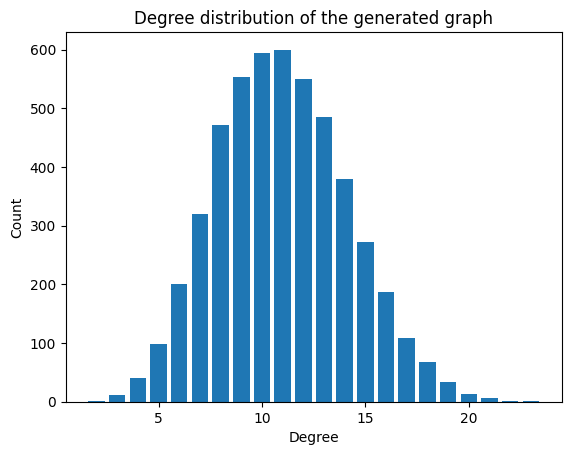

In [432]:
#create a graph that has the degree distribution of the Poisson distribution
G = nx.configuration_model(poi)

#plot the degree distribution of the generated graph with axes labels and title
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
g_hist = np.histogram(degree_sequence, bins=bin_v)
plt.bar(g_hist[1][1:], g_hist[0])
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree distribution of the generated graph')

NS 3.1 (Erdős-Rényi networks)

- a) L = 0.001 * 3000 * 2999 / 2 = 4498; k = 0.001*(2999) = 2.9
- b) The network is in the Supercritical regime
- c) 2999 * p = 1 --> p = 3.3*10-4
- d) ln(N) = 0.001 * (N-1) --> N ~ 9120
- e) k = 9.119; d = 4.125


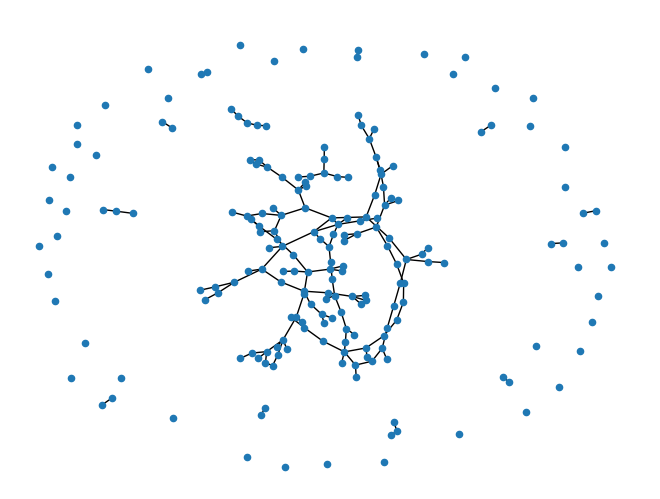

In [443]:
G_rand = nx.gnm_random_graph(200, 150)

#average degree of the random graph
sum(dict(G_rand.degree()).values())/len(G_rand)

nx.draw(G_rand, with_labels=False, node_size=20)

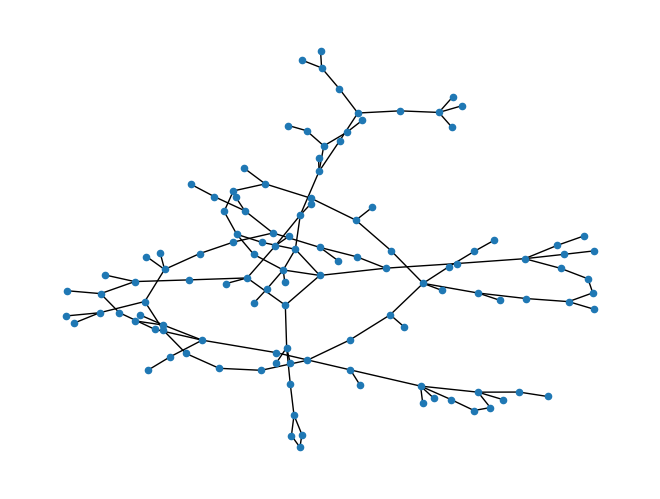

In [444]:
#get the giant component of the random graph
comps = nx.connected_components(G_rand)
giant = max(comps, key=len)

G_rand_giant = G_rand.subgraph(giant)

nx.draw(G_rand_giant, with_labels=False, node_size=20)


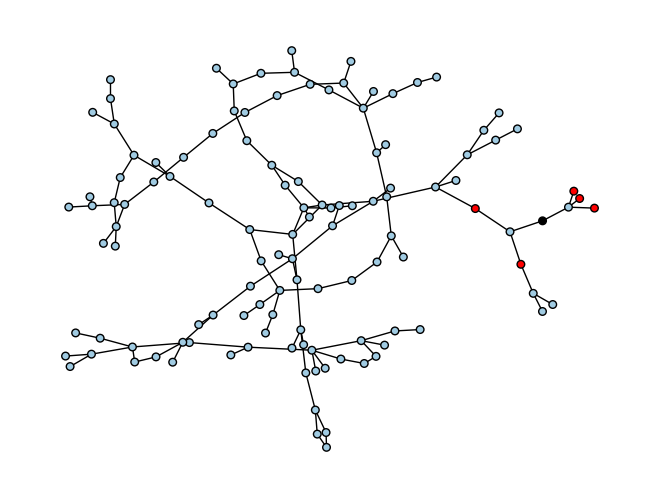

In [478]:
node = random.choice(list(G_rand_giant.nodes()))

color_map = []
for n in G_rand_giant.nodes():
    if n == node:
        color_map.append('black')
    elif nx.single_source_shortest_path_length(G_rand_giant, node, 2).get(n) == 2:
        color_map.append('red')
    else:
        color_map.append('#A0CBE2')

nx.draw(G_rand_giant, node_color=color_map, with_labels=False, node_size=30, edgecolors='black')